# Detecting Edges and Applying Image Filters

### Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Blurring

In [2]:
img = cv2.imread('Ronak.jpeg')
rows, cols = img.shape[:2]

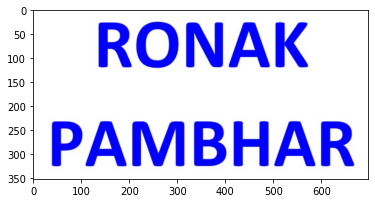

In [3]:
plt.imshow(img)
#cv2.imshow('Original', img)

In [4]:
kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]])
kernel_3x3 = np.ones((3,3), np.float32) / 9.0
kernel_5x5 = np.ones((5,5), np.float32) / 25.0

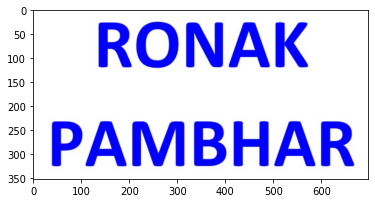

In [5]:
output = cv2.filter2D(img, -1, kernel_identity)
plt.imshow(output)
#cv2.imshow('Identity filter', output)

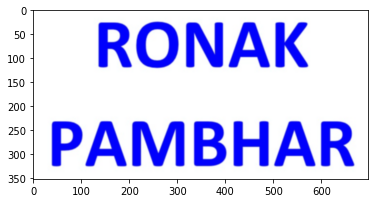

In [6]:
output = cv2.filter2D(img, -1, kernel_3x3)
plt.imshow(output)
#cv2.imshow('3x3 filter', output)

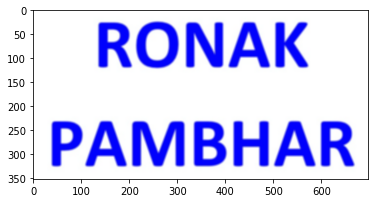

In [7]:
output = cv2.filter2D(img, -1, kernel_5x5)
plt.imshow(output)
#cv2.imshow('5x5 filter', output)

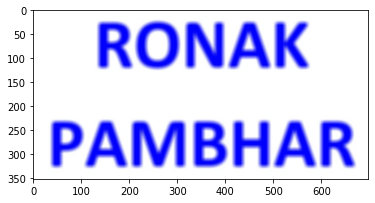

In [8]:
kernel_10x10 = np.ones((10,10), np.float32) / 100.0
output = cv2.filter2D(img, -1, kernel_10x10)
plt.imshow(output)
#cv2.imshow('10x10 filter', output)

### Blurring (Simple way)
##### The size of the kernel versus the blurriness

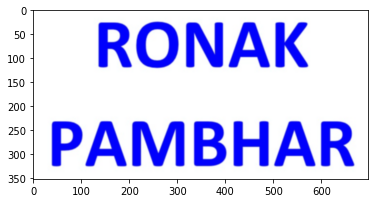

In [9]:
output = cv2.blur(img, (3,3))
plt.imshow(output)

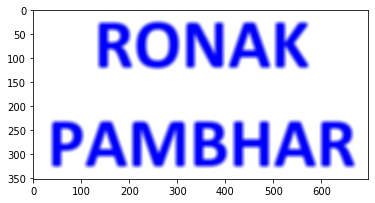

In [10]:
output = cv2.blur(img, (10,10))
plt.imshow(output)

## Edge detection

In [11]:
img = cv2.imread('Geometric shape.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

In [12]:
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

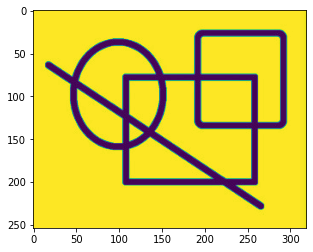

In [13]:
plt.imshow(img)
#cv2.imshow('Original', img)

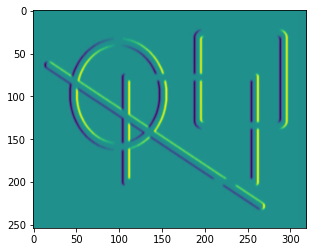

In [14]:
plt.imshow(sobel_horizontal)
#cv2.imshow('Sobel horizontal', sobel_horizontal)

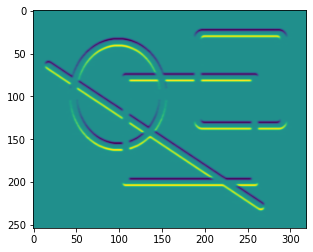

In [15]:
plt.imshow(sobel_vertical)
#cv2.imshow('Sobel vertical', sobel_vertical)

### Edge detection (with laplacian)

In [16]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

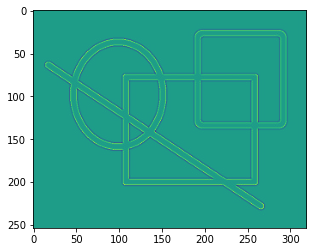

In [17]:
plt.imshow(laplacian)

### Edge detection (with use sum of two image)

In [18]:
combo_image = cv2.addWeighted(sobel_horizontal, 0.5, sobel_vertical, 1, 1)

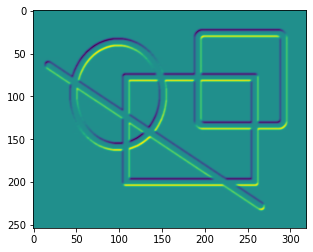

In [19]:
plt.imshow(combo_image)

### Edge Detection (with complex design)

In [20]:
img = cv2.imread('Train.jpg')
#rows, cols = img.shape

In [21]:
#img = cv2.imread('Train.jpg', cv2.IMREAD_GRAYSCALE)

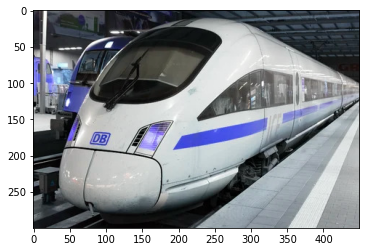

In [22]:
plt.imshow(img)

In [23]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


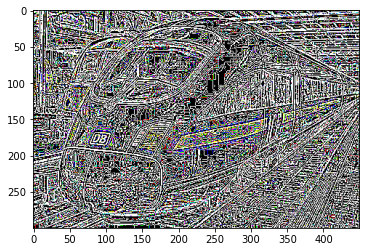

In [24]:
plt.imshow(laplacian)

In [25]:
img = cv2.imread('Train.jpg', cv2.IMREAD_GRAYSCALE)

In [26]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

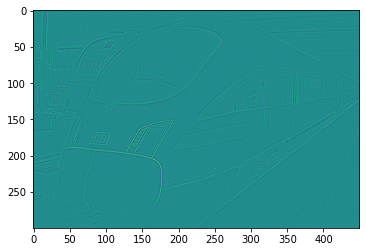

In [27]:
plt.imshow(laplacian)

As we can see, the quality of the Canny edge detector is much better. It takes two numbers
as arguments to indicate the thresholds. The second argument is called the low threshold
value, and the third argument is called the high threshold value. If the gradient value is
above the high threshold value, it is marked as a strong edge. The Canny Edge Detector
starts tracking the edge from this point and continues the process until the gradient value
falls below the low threshold value. As you increase these thresholds, the weaker edges
will be ignored. The output image will be cleaner and sparser.

In [28]:
canny = cv2.Canny(img, 50, 240)

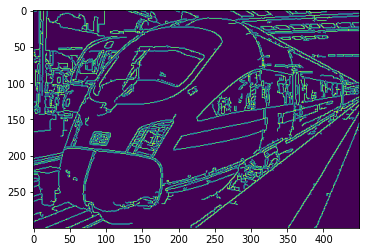

In [29]:
plt.imshow(canny)

## Motion blur

In [30]:
img = cv2.imread('Train.jpg')

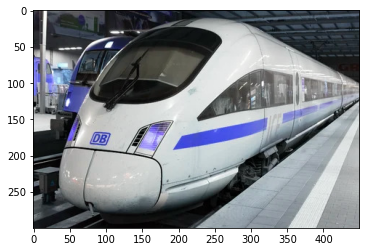

In [31]:
plt.imshow(img)

In [32]:
size = 15
# generating the kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size
# applying the kernel to the input image
output = cv2.filter2D(img, -1, kernel_motion_blur)

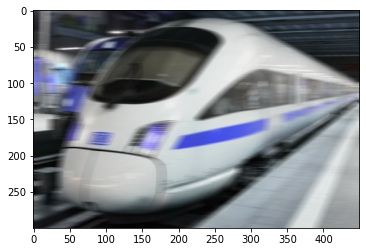

In [33]:
plt.imshow(output)
#cv2.imshow('Motion Blur', output)

## Sharpening

In [34]:
img = cv2.imread('Tree.jpg')

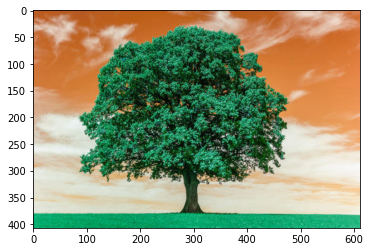

In [35]:
plt.imshow(img)

In [36]:
kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel_sharpen_2 = np.array([[1,1,1], [1,-7,1], [1,1,1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
[-1,2,2,2,-1],
[-1,2,8,2,-1],
[-1,2,2,2,-1],
[-1,-1,-1,-1,-1]]) / 8.0
# applying different kernels to the input image
output_1 = cv2.filter2D(img, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)

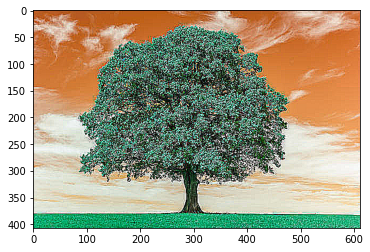

In [37]:
plt.imshow(output_1)
#cv2.imshow('Sharpening', output_1)

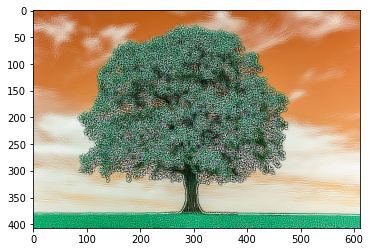

In [38]:
plt.imshow(output_2)
#cv2.imshow('Excessive Sharpening', output_2)

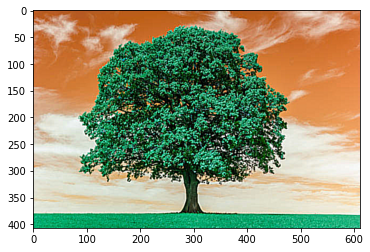

In [39]:
plt.imshow(output_3)
#cv2.imshow('Edge Enhancement', output_3)

## Embossing

In [40]:
img_emboss_input = cv2.imread('Bungalow.jpg')

In [41]:
# generating the kernels
kernel_emboss_1 = np.array([[0,-1,-1], [1,0,-1], [1,1,0]])
kernel_emboss_2 = np.array([[-1,-1,0], [-1,0,1], [0,1,1]])
kernel_emboss_3 = np.array([[1,0,0], [0,0,0], [0,0,-1]])
# converting the image to grayscale
#gray_img = cv2.cvtColor(img_emboss_input,cv2.COLOR_BGR2GRAY)

In [42]:
# applying the kernels to the grayscale image and adding the offset
output_1 = cv2.filter2D(img_emboss_input, -1, kernel_emboss_1) + 128
output_2 = cv2.filter2D(img_emboss_input, -1, kernel_emboss_2) + 128
output_3 = cv2.filter2D(img_emboss_input, -1, kernel_emboss_3) + 128

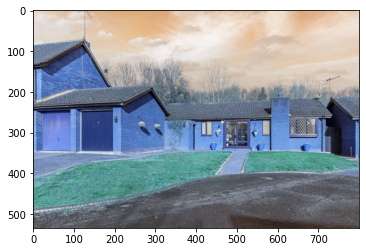

In [43]:
plt.imshow(img_emboss_input)

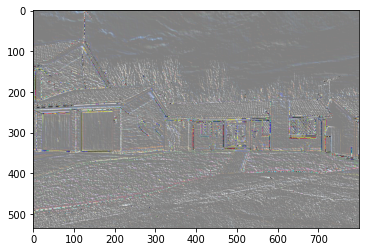

In [44]:
plt.imshow(output_1)

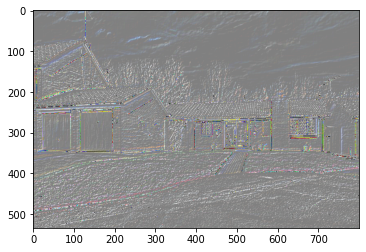

In [45]:
plt.imshow(output_2)

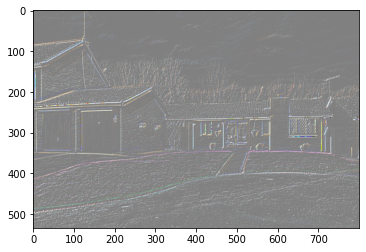

In [46]:
plt.imshow(output_3)

## Erosion and dilation

In [47]:
img = cv2.imread('Ronak_Pambhar.jpg', 0)

In [48]:
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

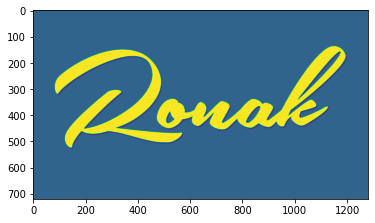

In [49]:
plt.imshow(img)
#cv2.imshow('Input', img)

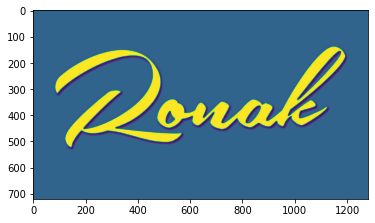

In [50]:
plt.imshow(img_erosion)
#cv2.imshow('Erosion', img_erosion)

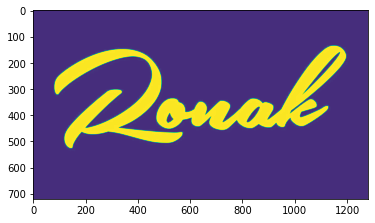

In [51]:
plt.imshow(img_dilation)
#cv2.imshow('Dilation', img_dilation)

## Creating a vignette filter

In [52]:
img = cv2.imread('Flowers.jpg')
rows, cols = img.shape[:2]

In [53]:
# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(cols,200)
kernel_y = cv2.getGaussianKernel(rows,200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
output = np.copy(img)

In [54]:
# applying the mask to each channel in the input image
for i in range(3):
    output[:,:,i] = output[:,:,i] * mask

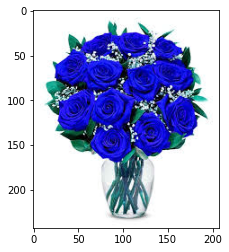

In [55]:
plt.imshow(img)
#cv2.imshow('Original', img)

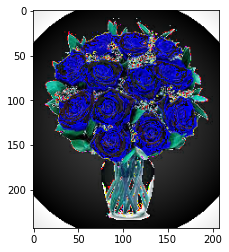

In [56]:
plt.imshow(output)
#cv2.imshow('Vignette', output)

### move the focus around

In [57]:
# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(int(1.5*cols),200)
kernel_y = cv2.getGaussianKernel(int(1.5*rows),200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
mask = mask[int(0.5*rows):, int(0.5*cols):]
output = np.copy(img)

In [58]:
# applying the mask to each channel in the input image
for i in range(3):
    output[:,:,i] = output[:,:,i] * mask

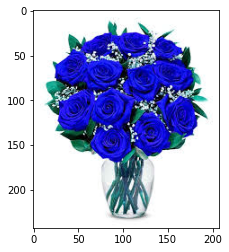

In [59]:
plt.imshow(img)
#cv2.imshow('Input', img)

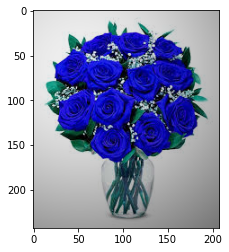

In [60]:
plt.imshow(output)
#cv2.imshow('Vignette with shifted focus', output)

## Enhancing the contrast in an image

In [61]:
img = cv2.imread('Dark_image.jpg')

In [62]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [63]:
# equalize the histogram of the input image
histeq = cv2.equalizeHist(gray)

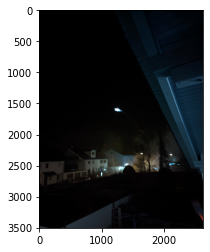

In [64]:
plt.imshow(img)
#cv2.imshow('Input', img)

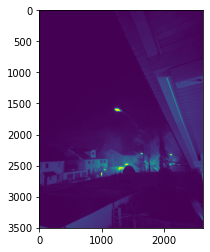

In [65]:
plt.imshow(gray)

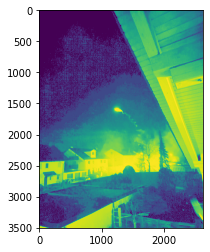

In [66]:
plt.imshow(histeq)
#cv2.imshow('Histogram equalized', histeq)

In [67]:
img = cv2.imread('Night_image.jpg')

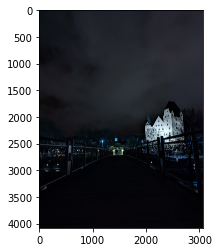

In [68]:
plt.imshow(img)

In [69]:
img = cv2.imread('Night_image.jpg', 0)

In [70]:
# equalize the histogram of the input image
histeq = cv2.equalizeHist(img)

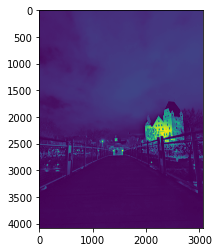

In [71]:
plt.imshow(img)
#cv2.imshow('Input', img)

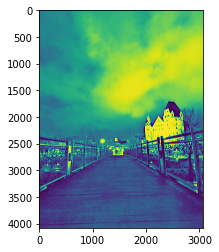

In [72]:
plt.imshow(histeq)
#cv2.imshow('Histogram equalized', histeq)

## Color changing RGB to YUV

In [73]:
img = cv2.imread('color_change.jpg')

In [74]:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

In [75]:
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

In [76]:
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

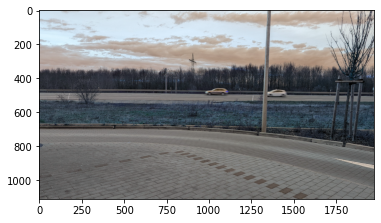

In [77]:
plt.imshow(img)
#cv2.imshow('Color input image', img)

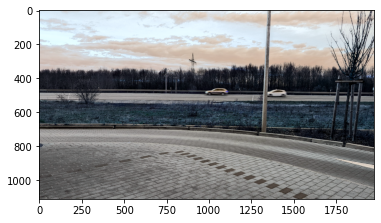

In [78]:
plt.imshow(img_output)
#cv2.imshow('Histogram equalized', img_output)